In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

df_USA5=df[df['job_country'] == 'United States'].copy() #to create unique dataframe 

In [4]:
df_USA5['job_posted_monthly']=df_USA5['job_posted_date'].dt.strftime('%B')
#strftime('%B')means: format the date as a string showing the full month name.

In [5]:
#https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [4]:
df_USA5

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_monthly
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN,January


In [6]:
df_Usa_pivot=df_USA5.pivot_table(index='job_posted_monthly', columns='job_title_short', aggfunc='size')
#size will count how many different job 

In [6]:
df_Usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_monthly,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [7]:
#Use size→ when you want to count all rows (even with missing data).

#Use count→ when you want to count only valid (non-null) entries.

#df_Usa_pivot['month_no']=pd.to_datetime(df['job_posted_monthly'])
#error because pd.to_datetime()expects something like _2025-06-01 But put you June,May
#so you need to add format 

In [10]:
df_Usa_pivot.reset_index(inplace=True)
#df_USA5['job_posted_monthly']=df_USA5['job_posted_date'].dt.strftime('%B')
df_Usa_pivot['month_no']=pd.to_datetime(df_Usa_pivot['job_posted_monthly'], format='%B').dt.month
df_Usa_pivot.sort_values('month_no',inplace=True)
#finally we order dataframe by job_posted_monthly
df_Usa_pivot.set_index('job_posted_monthly', inplace=True)
df_Usa_pivot.drop(columns='month_no', inplace=True)


In [11]:
df_Usa_pivot

job_title_short,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_monthly,,,,,,,,,,,
January,4,527,36,8494,2655,6915,60,1544,773,1552,114
February,3,447,24,6124,3060,4956,56,1258,878,1127,90
March,7,438,19,6218,3183,4779,59,1114,829,1150,115
April,0,565,40,6049,2801,4867,51,1025,781,991,112
May,8,279,20,4993,2976,4377,49,839,746,914,90
June,6,446,32,5683,2893,4645,48,1009,812,1033,93
July,5,581,39,5201,2570,4876,65,883,747,1095,153
August,1,903,39,6634,3269,6318,68,1186,903,1515,194
September,11,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_monthly'>

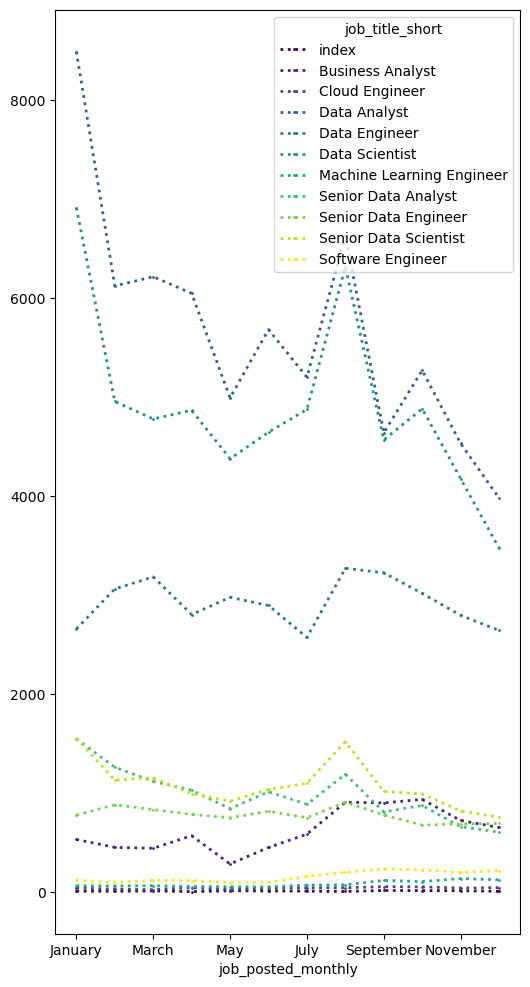

In [24]:
df_Usa_pivot.plot(kind='line',
                linewidth=2,
                colormap='viridis',
                marker='o',
                markersize=1,
                linestyle=':',
                figsize=(6,12))

In [35]:
df_Usa_pivot

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_monthly,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


## i just want top three job 

In [11]:
#i just want top three job 
top_jobs=['Data Analyst','Data Engineer','Data Scientist']
df_Usa_pivot=df_Usa_pivot[top_jobs]

In [12]:
df_Usa_pivot

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_posted_monthly,,,
January,8494,2655,6915
February,6124,3060,4956
March,6218,3183,4779
April,6049,2801,4867
May,4993,2976,4377
June,5683,2893,4645
July,5201,2570,4876
August,6634,3269,6318
September,4639,3224,4568


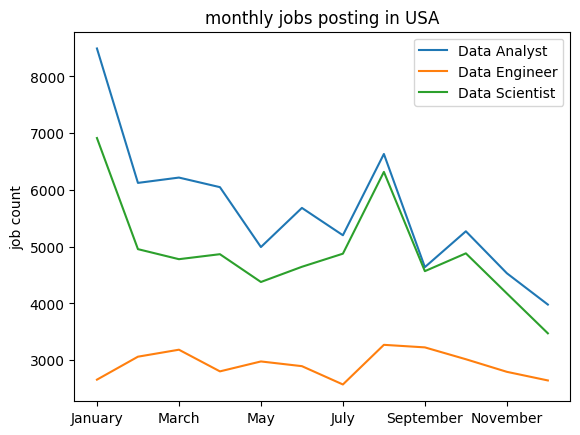

In [268]:
df_Usa_pivot.plot(kind='line')
plt.xlabel('')
plt.ylabel('job count')
plt.title('monthly jobs posting in USA')
plt.legend()
plt.show()

In [32]:
#another_way
top_3= df_USA5['job_title_short'].value_counts().sort_values(ascending=False).head(3)
top_3=top_3.index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [33]:
df_Usa_pivot[top_3]

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_monthly,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


<Axes: xlabel='job_posted_monthly'>

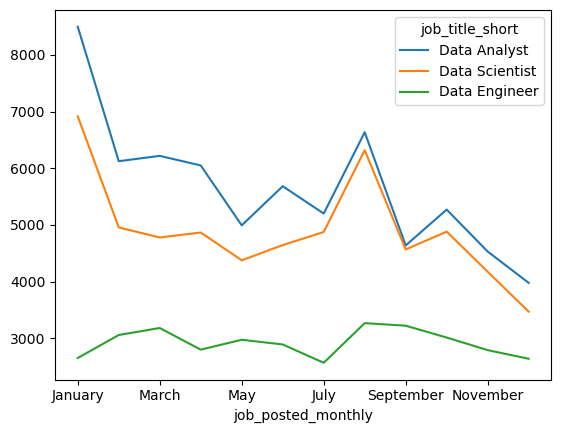

In [34]:
df_Usa_pivot=df_Usa_pivot[top_3]
df_Usa_pivot.plot(kind='line')


## summary of code

In [ ]:
#this code sorts dataframe by months names then restore the months as index 
#this enure the dataframe ordered as months names while keep months in index 
#**Before `reset_index()`: `'job_posted_monthly'` is the **index of the DataFrame*
#It is not a column, so you cannot access it with `df['job_posted_monthly']`.
##After `reset_index()`:'job_posted_monthly'` is moved into a normal column
#becaue Pandas adds a new default integer index (0, 1, 2, …) for the rows.
#set_index() set job_posted_month as index and remove 0,1,2,.. created by reset_index()
#month_no it only create to help df sort by job_posted_index

